There are 25 variables:

ID: ID of each client <br>
LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
SEX: Gender (1=male, 2=female) <br>
EDUCATION: (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others) <br>
MARRIAGE: Marital status  (1 = married; 2 = single; 3 = divorce; 0=others) <br>
AGE: Age in years <br>
PAY_0: Repayment status in September, 2005 (-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.) <br>
-2 = Balance paid in full and no transactions this period (we may refer to this credit card account as having been 'inactive' this period) <br>
0 = Customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance
PAY_2: Repayment status in August, 2005 (scale same as above) <br>
PAY_3: Repayment status in July, 2005 (scale same as above) <br>
PAY_4: Repayment status in June, 2005 (scale same as above) <br>
PAY_5: Repayment status in May, 2005 (scale same as above) <br>
PAY_6: Repayment status in April, 2005 (scale same as above) <br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) <br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) <br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) <br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) <br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) <br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) <br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) <br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) <br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) <br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) <br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) <br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) <br>
default.payment.next.month: Default payment (1= default, 0=not default) <br>

### 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
default_file_path = './data/UCI_Credit_Card.csv'

In [3]:
#create dataframe
df = pd.read_csv(default_file_path,sep=',')

### Some data preparation

In [4]:
#drop column because we don't use it to analyze
df = df.drop(columns=['ID'])

In [5]:
#rename column
df.rename(columns = {'default.payment.next.month':'isDefaulter', }, inplace = True) 

In [6]:
#show some data in datframe
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,isDefaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
#to see that is there any missing data
df.isna().sum()

LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
isDefaulter    0
dtype: int64

### 2. Data cleaning

-> For the "EDUCATION" feature, category 5 and 6 are unlabelled and category 0 is undocumented
-> Similarly, the "MARRIAGE" feature includes an undocumented label 0

In [8]:
# add EDUCATION is 4,5,6 as 0 which mean others
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 4)
df.loc[fil, 'EDUCATION'] = 0
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

The "PAY_n" variables show how many months a payment is late. A value of "-1" meaning the payment was made on time according to the document. However, the meaning of "-2" and "0" is not clear. To make things clearer, it would be a good idea to consider "on-time payment" as 0

In [9]:
# df.to_csv('data/UCI_Credit_Card_new.csv', index=False, encoding='utf-8', header=True)

In [10]:

# def replace_to_zero(col):
#     fil = (df[col] == -2) | (df[col] == -1) | (df[col] == 0)
#     df.loc[fil, col] = 0

# for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
#     replace_to_zero(i)

### 3. Exploratory Data Analysis

In [11]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,isDefaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [12]:
#see type of each column
df.dtypes

LIMIT_BAL      float64
SEX              int64
EDUCATION        int64
MARRIAGE         int64
AGE              int64
PAY_0            int64
PAY_2            int64
PAY_3            int64
PAY_4            int64
PAY_5            int64
PAY_6            int64
BILL_AMT1      float64
BILL_AMT2      float64
BILL_AMT3      float64
BILL_AMT4      float64
BILL_AMT5      float64
BILL_AMT6      float64
PAY_AMT1       float64
PAY_AMT2       float64
PAY_AMT3       float64
PAY_AMT4       float64
PAY_AMT5       float64
PAY_AMT6       float64
isDefaulter      int64
dtype: object

-> No null values and datatypes are also correct
-> There are 30000 records in the dataset

In [13]:
# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.779867,1.551867
std,0.489129,0.728486,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,3.000000,3.000000


In [14]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [15]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


-> Can Negative values be interpreted as credit? Need to investigate furthur

In [16]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


<Axes: >

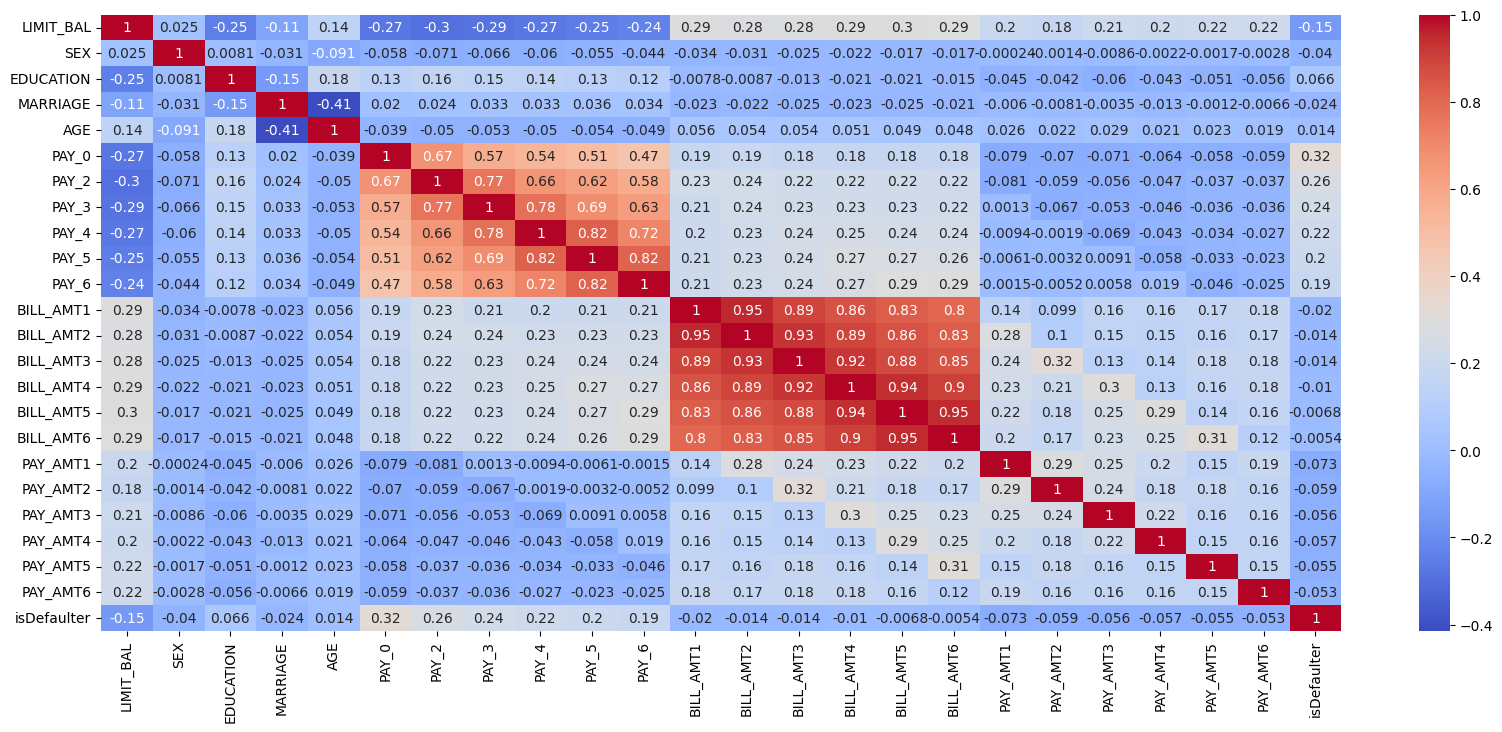

In [17]:
#use correlation to see which features are relate to each other
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<Axes: xlabel='x', ylabel='y'>

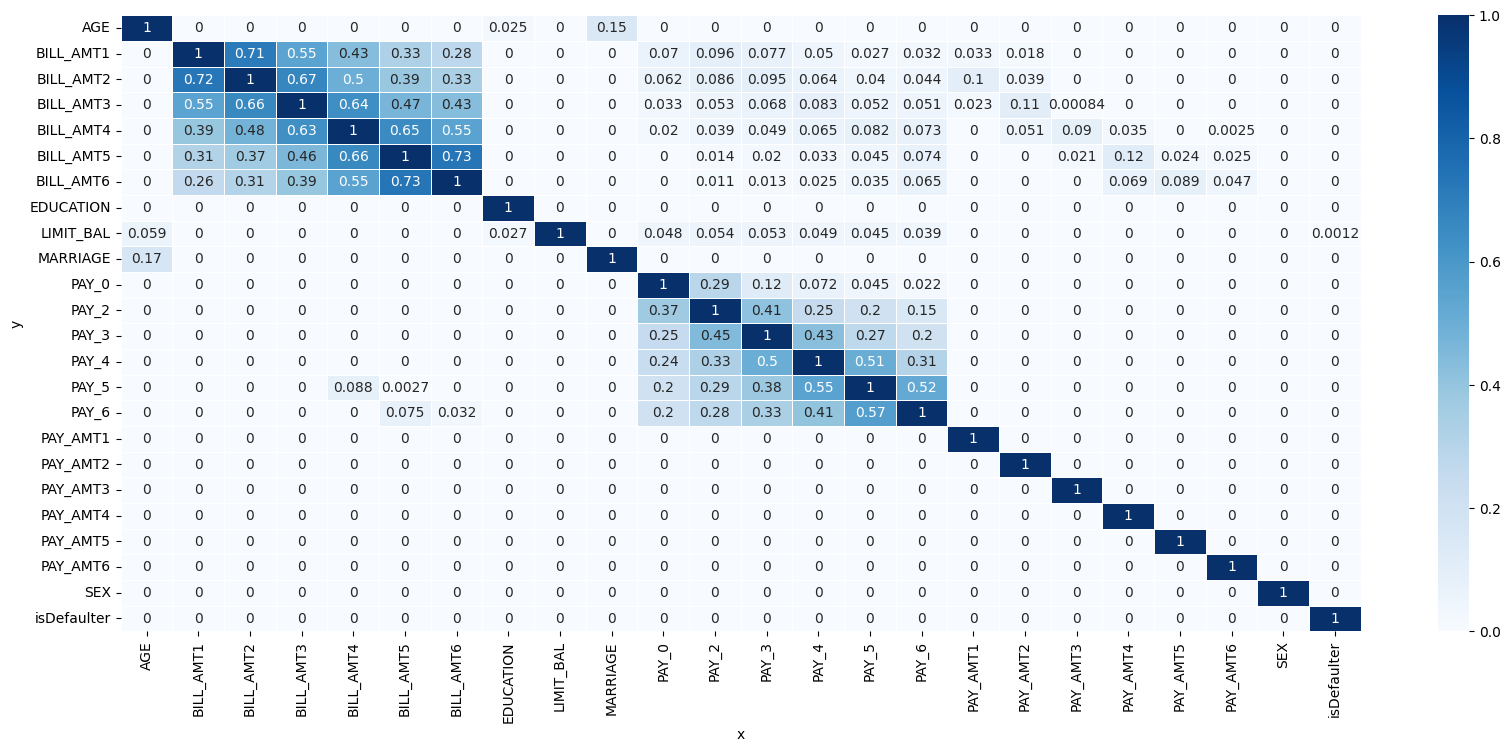

In [18]:
import ppscore as pps

dfcopy = df.copy()
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize = (20,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

### 4. Feature selection  (For now we select all features maybe we can cut this part)

In [19]:
X = df[        ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']        ]

# Assign selling price as label
y = df["isDefaulter"]

In [20]:
# Split the data to training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 5. Preprocessing

In [21]:
from sklearn.preprocessing import StandardScaler

# Scale only numeric column
scaled_feature = ['LIMIT_BAL', 'AGE' , 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

scaler = StandardScaler()
X_train[scaled_feature] = scaler.fit_transform(X_train[scaled_feature])
X_test[scaled_feature]  = scaler.transform(X_test[scaled_feature])


In [22]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21753,-0.672359,2,2,2,-1.244658,0,0,0,0,0,...,0.455707,0.479450,-0.008367,0.011698,-0.126892,-0.039537,-0.173567,-0.224654,-0.216008,-0.245240
251,-1.057768,1,2,2,-0.811521,0,0,0,0,0,...,-0.254132,-0.277182,-0.299323,-0.653898,-0.038915,-0.194250,-0.241596,-0.240785,-0.308523,-0.295532
22941,0.098459,2,0,1,0.921024,0,0,-1,-1,-1,...,-0.662788,-0.671371,-0.548685,-0.479473,-0.331937,-0.210475,-0.288246,0.122676,0.353487,-0.285107
618,-0.826523,1,1,2,-1.136374,0,0,0,0,0,...,-0.118736,-0.052671,-0.008763,0.006350,-0.213815,-0.167236,-0.178610,-0.207358,-0.186877,-0.180973
17090,-0.286950,2,2,2,-1.136374,0,0,0,0,0,...,0.981423,1.167654,1.330983,1.436224,-0.091947,-0.072522,-0.014157,0.007308,0.011598,0.317359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,-0.903605,1,2,2,-0.378385,0,0,0,0,0,...,0.129677,0.202027,-0.179969,-0.550677,-0.214869,-0.121938,-0.201031,-0.294942,-0.235919,3.909990
5390,0.252623,1,1,2,0.163035,2,2,2,2,2,...,1.756029,1.891243,2.125496,2.248967,0.458274,0.001602,-0.288246,0.160641,0.075622,-0.066413
860,-0.903605,1,1,2,-1.028090,-2,-2,-2,-2,-2,...,-0.675060,-0.671371,-0.662168,-0.653898,-0.331937,-0.245478,-0.288246,-0.299358,-0.308523,-0.295532
15795,-0.749441,2,2,2,-1.136374,0,0,0,0,2,...,0.063452,-0.123174,-0.189946,-0.180911,-0.156335,-0.163118,-0.041565,-0.225758,-0.308523,-0.226796


In [23]:
#see whether data is imbalance or not
ratio = y_train.value_counts()
print(ratio)

0    18677
1     5323
Name: isDefaulter, dtype: int64


In [24]:
#use over sampling to deal with imbalance data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

ratio = y_train.value_counts()
print(ratio)

0    18677
1    18677
Name: isDefaulter, dtype: int64


In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [26]:
# save the scaler value for using on app
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))

### 6.Train


#### Classification

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
import xgboost as xgb
import joblib
from sklearn.metrics import accuracy_score, recall_score, roc_curve, roc_auc_score, auc


Logistic Regression model

In [28]:
# Use Grid Search to find parameter that make best logistic regression model
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'recall', n_jobs = -1, cv = 5)
grid_lr_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [29]:
grid_lr_clf.best_params_

{'C': 10, 'penalty': 'l2'}

In [30]:
best_logic_reg = grid_lr_clf.best_estimator_
joblib.dump(best_logic_reg, 'best_logistic_regression_model.pkl')

['best_logistic_regression_model.pkl']

In [31]:
val_class_preds = best_logic_reg.predict(X_val)

In [32]:
val_accuracy = accuracy_score(val_class_preds,y_val)

print("The accuracy on validation data is ", val_accuracy)

The accuracy on validation data is  0.677553205728818


In [33]:
val_accuracy = recall_score(val_class_preds,y_val)

print("The recall score on validation data is ", val_accuracy)

The recall score on validation data is  0.6887884778311212


Gaussian Naive Bayes model

In [34]:
param_grid = {'var_smoothing': [1e-11, 1e-10, 1e-9]}

grid_lr_clf = GridSearchCV(GaussianNB(), param_grid, scoring = 'recall', n_jobs = -1, cv = 5)
grid_lr_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-11, 1e-10, 1e-09]},
             scoring='recall')

In [35]:
grid_lr_clf.best_params_

{'var_smoothing': 1e-11}

In [36]:
best_GaussianNB = grid_lr_clf.best_estimator_
joblib.dump(best_GaussianNB, 'best_GaussianNB_model.pkl')

['best_GaussianNB_model.pkl']

In [37]:
val_class_preds = best_GaussianNB.predict(X_val)

In [38]:
val_accuracy = accuracy_score(val_class_preds,y_val)

print("The accuracy on validation data is ", val_accuracy)

The accuracy on validation data is  0.5946995047517066


In [39]:
val_accuracy = recall_score(val_class_preds,y_val)

print("The recall score on validation data is ", val_accuracy)

The recall score on validation data is  0.5604580666891209


Random Forest model

In [40]:
param_grid = {'n_estimators': [100,200,300,400], 'max_depth': [10,20,30,40,50]}

grid_lr_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'recall', n_jobs = -1, cv = 5)
grid_lr_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='recall')

In [41]:
grid_lr_clf.best_params_

{'max_depth': 30, 'n_estimators': 400}

In [42]:
best_random_forest = grid_lr_clf.best_estimator_
joblib.dump(best_random_forest,'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [43]:
val_class_preds = best_random_forest.predict(X_val)

In [44]:
val_accuracy = accuracy_score(val_class_preds,y_val)

print("The accuracy on validation data is ", val_accuracy)

The accuracy on validation data is  0.8553071877927988


In [45]:
val_accuracy = recall_score(val_class_preds,y_val)

print("The recall score on validation data is ", val_accuracy)

The recall score on validation data is  0.8612089997289238


XGBoost Model

In [46]:
param_grid = {'max_depth':[3,5,7,9], 'min_child_weight':[1,3,5]}

grid_lr_clf = GridSearchCV(xgb.XGBClassifier(), param_grid, scoring = 'recall', n_jobs = -1, cv = 5)
grid_lr_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...in=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5]},
             scoring='recall')

In [47]:
grid_lr_clf.best_params_

{'max_depth': 9, 'min_child_weight': 1}

In [48]:
best_xgboost = grid_lr_clf.best_estimator_
joblib.dump(best_xgboost,'best_xgboost_model.pkl')

['best_xgboost_model.pkl']

In [49]:
val_class_preds = best_xgboost.predict(X_val)

In [50]:
val_accuracy = accuracy_score(val_class_preds,y_val)

print("The accuracy on validation data is ", val_accuracy)

The accuracy on validation data is  0.866550662561906


In [51]:
val_accuracy = recall_score(val_class_preds,y_val)

print("The recall score on validation data is ", val_accuracy)

The recall score on validation data is  0.8859870822802584


| Model | Accuracy on validation | Recall on validation
|:------------------------|:----------:|:---------:|
| Logistic Regression |  0.6776  | 0.6888 |
| Gaussian Naive Bayes |   0.5947 |  0.5605 |
| Random Forest |  0.8542   | 0.8612 |
| XGBoost |   0.8659    | 0.8860 |

From the performance table, we can conclude that XGBoost is our best model

#### Test the best model with test set

0.7923333333333333
0.5300448430493273
0.4501142421934501
0.486820428336079
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4687
           1       0.53      0.45      0.49      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000



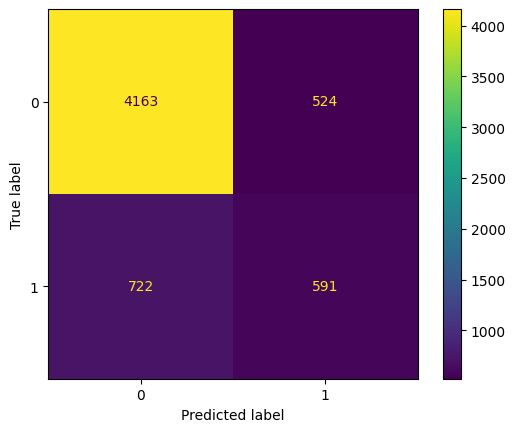

In [52]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import classification_report


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# load a model from MLflow
model = joblib.load('best_xgboost_model.pkl')
ypred = model.predict(X_test)

print(accuracy_score(y_test, ypred))
print(precision_score(y_test, ypred))
print(recall_score(y_test, ypred))
print(f1_score(y_test, ypred))

# print classification report
print(classification_report(y_test, ypred))

#display confusion matrix
cm = confusion_matrix(y_test, ypred)
cmp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])

cmp.plot()




In [53]:
preds = model.predict_proba(X_test)[1,:] 
preds

array([0.9379407 , 0.06205927], dtype=float32)

In [54]:
y_test.iloc[1]

0